In [3]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# import important libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# import important libraries for data preprocessing
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

        
import warnings
warnings.filterwarnings('ignore')

/kaggle/input/loan-prediction-problem-dataset/test_Y3wMUE5_7gLdaTN.csv
/kaggle/input/loan-prediction-problem-dataset/train_u6lujuX_CVtuZ9i.csv


## Loading the dataset

In [156]:
train_data = pd.read_csv("/kaggle/input/loan-prediction-problem-dataset/train_u6lujuX_CVtuZ9i.csv")
print("Trian data shape : ",train_data.shape)
test_data = pd.read_csv("/kaggle/input/loan-prediction-problem-dataset/test_Y3wMUE5_7gLdaTN.csv")
print("Trian data shape : ",test_data.shape)

Trian data shape :  (614, 13)
Trian data shape :  (367, 12)


In [5]:
train_data.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
test_data.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


## Exploring the dataset

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


<Figure size 432x288 with 0 Axes>

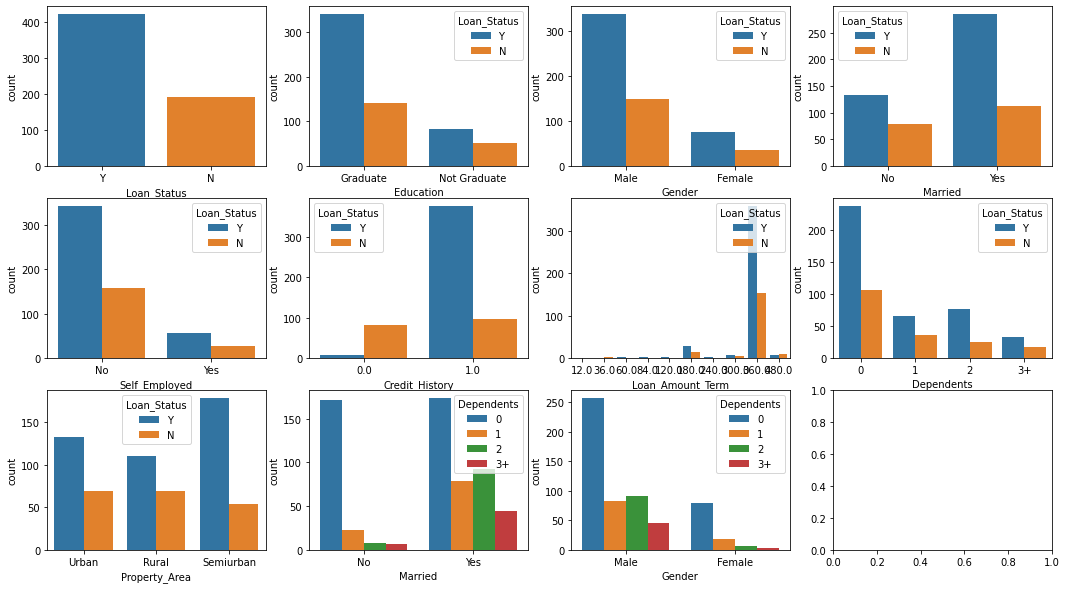

<Figure size 432x288 with 0 Axes>

In [8]:

fig , ax = plt.subplots(3,4 , figsize=(18,10))
sns.countplot(train_data["Loan_Status"] , ax = ax[0,0])
sns.countplot(train_data["Education"],hue=train_data["Loan_Status"],ax=ax[0,1])
sns.countplot(train_data["Gender"],hue=train_data["Loan_Status"],ax=ax[0,2])
sns.countplot(train_data["Married"],hue=train_data["Loan_Status"],ax=ax[0,3])
sns.countplot(train_data["Self_Employed"],hue=train_data["Loan_Status"],ax=ax[1,0])
sns.countplot(train_data["Credit_History"],hue=train_data["Loan_Status"] , ax = ax[1,1])
sns.countplot(train_data["Loan_Amount_Term"],hue=train_data["Loan_Status"] , ax = ax[1,2])
sns.countplot(train_data["Dependents"],hue=train_data["Loan_Status"] , ax = ax[1,3])
sns.countplot(train_data["Property_Area"],hue=train_data["Loan_Status"] , ax = ax[2,0])
sns.countplot(train_data["Married"],hue=train_data["Dependents"] , ax = ax[2,1])
sns.countplot(train_data["Gender"],hue=train_data["Dependents"] , ax = ax[2,2])

plt.figure()


## Insights through the visualizations :

* There is impalance in the column **Loan_Status** which is the target column of the dataset with ratio 3:1 . 
* Loans of **Graduated** applicants are more acceptable than the **Not Graduated** ones .
* Loans of **Male** applicants are more acceptable than the **Female** ones .
* Loans of **Married** applicants are more acceptable than the **Not Married** ones .
* Loans of **Not Self Employed** applicants are more acceptable than the **Self Employed** ones .
* *Credit History* is a significant indecator for Loan acceptance as loans of people with **good Credit History** are more accepted .
* Most of loans applications are 360 months term loan with high acceptance ratio .
* The **low Dependents** the applicant have the **more accepted** his loan is .
* Rural people have the **least** acceptance ratio compare to Urban and Semiurban .
* Although **Married** people have **more Dependents** than others , their loans are more accepted .
* The same for **Male** applicants have **more Dependents** than **Females** but their loans are most likely to be accepted .

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

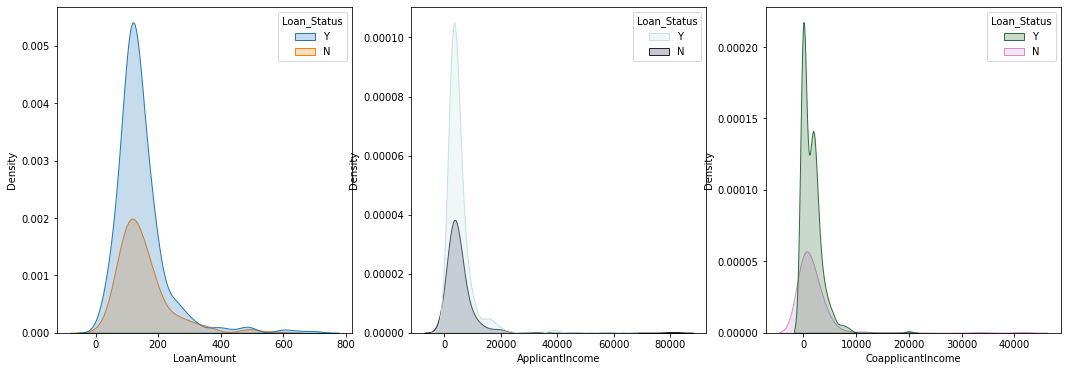

In [64]:
fig , ax = plt.subplots(1,3 , figsize=(18,6))
sns.kdeplot(train_data["LoanAmount"], hue=train_data["Loan_Status"] , fill=True , ax = ax[0])
sns.kdeplot(train_data["ApplicantIncome"], hue=train_data["Loan_Status"] , fill=True , palette="ch:start=.2,rot=-.3" , ax = ax[1])
sns.kdeplot(train_data["CoapplicantIncome"], hue=train_data["Loan_Status"] , fill=True , palette="cubehelix" , ax = ax[2])

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='LoanAmount'>

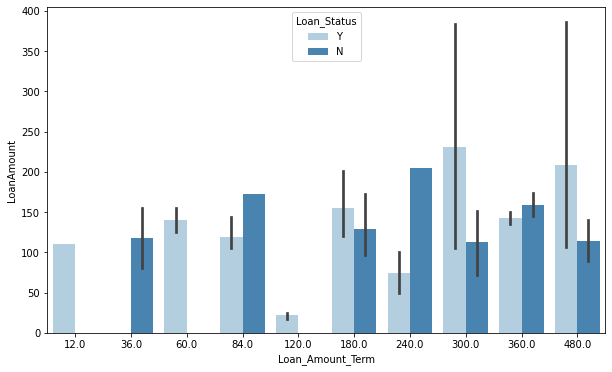

In [93]:
plt.figure(figsize=(10,6))
sns.barplot(train_data["Loan_Amount_Term"] , train_data["LoanAmount"] ,
            hue=train_data["Loan_Status"],palette="Blues",dodge=True ,estimator=np.mean  )

# Data Preprocessing 


### Handling nan values
* #### Used SimpleIputer to fill nan values of categorical attributes with the most frequent 
* #### Filled nan values for numiric attributes with their mean

In [10]:
train_data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [11]:
test_data.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [188]:
# Filling nan values with the most frequent for columns :
#(Gender,Married,Dependents,Self_Employed,Credit_History)
simple = SimpleImputer(strategy="most_frequent")
s = simple.fit_transform(train_data[["Gender",'Married','Dependents','Self_Employed','Credit_History','Loan_Amount_Term']])
train_data[["Gender",'Married','Dependents','Self_Employed','Credit_History','Loan_Amount_Term']] = s
## Filling nan values with mean for columns :
#(LoanAmount)
train_data['LoanAmount'] = train_data['LoanAmount'].fillna(train_data['LoanAmount'].mean())

In [160]:
# Filling nan values with the most frequent for columns :
#(Gender,Married,Dependents,Self_Employed,Credit_History)
simple = SimpleImputer(strategy="most_frequent")
s = simple.fit_transform(test_data[["Gender",'Married','Dependents','Self_Employed','Credit_History','Loan_Amount_Term']])
test_data[["Gender",'Married','Dependents','Self_Employed','Credit_History','Loan_Amount_Term']] = s
## Filling nan values with mean for columns :
#(LoanAmount)
test_data['LoanAmount'] = test_data['LoanAmount'].fillna(test_data['LoanAmount'].mean())

In [178]:
train_data.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [121]:
test_data.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [ ]:
# Now , let's drop the Loan_ID Column
train_data.drop(columns=['Loan_ID'] , inplace=True)
test_data.drop(columns=['Loan_ID'] , inplace=True)

In [123]:
test_data.head(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban
4,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


### Let's do some data transformations
* #####  Use OrdinalEncoder for categortical attributes 


In [190]:
ordinal_encoder = OrdinalEncoder()
min_max_scaler = MinMaxScaler()
std_scaler = StandardScaler()

In [125]:
train_data.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [191]:
ord_target = ordinal_encoder.fit_transform(train_data[["Gender",'Married','Education',
                                                       'Self_Employed','Credit_History',
                                                   "Property_Area",'Loan_Status']])
train_data[["Gender",'Married','Education',
            'Self_Employed','Credit_History',
            "Property_Area",'Loan_Status']] = ord_target

train_data[["Dependents","Loan_Amount_Term"]] = ordinal_encoder.fit_transform(train_data[["Dependents","Loan_Amount_Term"]])
train_data[['ApplicantIncome',
           'CoapplicantIncome',
           "LoanAmount"]] = min_max_scaler.fit_transform(train_data[['ApplicantIncome',
                                                                    'CoapplicantIncome',
                                                                    "LoanAmount"]])


In [192]:
ord_target = ordinal_encoder.fit_transform(test_data[["Gender",'Married','Education',
                                                       'Self_Employed','Credit_History',"Property_Area"]])
test_data[["Gender",'Married','Education',
            'Self_Employed','Credit_History',"Property_Area"]] = ord_target

test_data[["Dependents","Loan_Amount_Term"]] = ordinal_encoder.fit_transform(test_data[["Dependents","Loan_Amount_Term"]])
test_data[['ApplicantIncome',
           'CoapplicantIncome',
           "LoanAmount"]] = std_scaler.fit_transform(test_data[['ApplicantIncome',
                                                                    'CoapplicantIncome',
                                                                    "LoanAmount"]])


<AxesSubplot:>

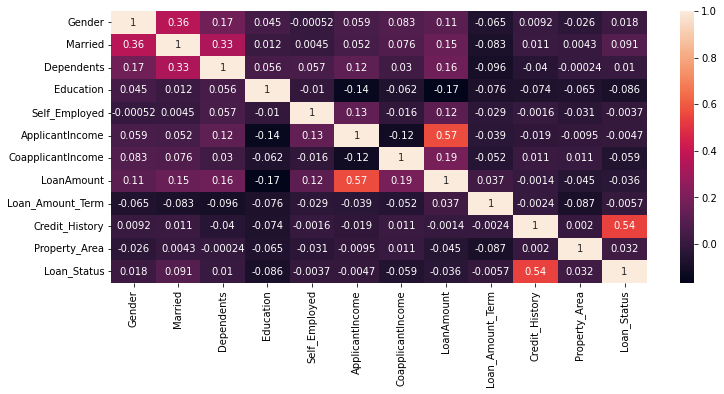

In [167]:
plt.figure(figsize=(12,5))
sns.heatmap(train_data.corr() , annot=True)

## Splitting the dataset


In [195]:
y = train_data["Loan_Status"]
X = train_data.drop(columns=["Loan_Status"])

In [197]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42,stratify=y)

# Training the models

In [198]:
models =  [LogisticRegression() , SVC(C=10,gamma=.01,kernel="rbf") , KNeighborsClassifier() ,
           DecisionTreeClassifier() , RandomForestClassifier()]
trianed_models = []
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(model)
    print("Accuracy : ",accuracy_score(y_test,y_pred))
    print("Confusion matrix : \n",confusion_matrix(y_test,y_pred))
    print("Classification report : \n",classification_report(y_test,y_pred))
    print("Train score : ",model.score(X_train,y_train))
    print("Test score : ",model.score(X_test,y_test),"\n\n\n")
    trianed_models.append(model)
    

LogisticRegression()
Accuracy :  0.8571428571428571
Confusion matrix : 
 [[ 27  21]
 [  1 105]]
Classification report : 
               precision    recall  f1-score   support

         0.0       0.96      0.56      0.71        48
         1.0       0.83      0.99      0.91       106

    accuracy                           0.86       154
   macro avg       0.90      0.78      0.81       154
weighted avg       0.87      0.86      0.84       154

Train score :  0.7934782608695652
Test score :  0.8571428571428571 



SVC(C=10, gamma=0.01)
Accuracy :  0.8571428571428571
Confusion matrix : 
 [[ 27  21]
 [  1 105]]
Classification report : 
               precision    recall  f1-score   support

         0.0       0.96      0.56      0.71        48
         1.0       0.83      0.99      0.91       106

    accuracy                           0.86       154
   macro avg       0.90      0.78      0.81       154
weighted avg       0.87      0.86      0.84       154

Train score :  0.7934782608695

## Trying to solve impalance problem in the dataset

In [200]:
ros = RandomOverSampler(sampling_strategy="auto")
resampled_x , resampled_y = ros.fit_resample(X,y)


In [213]:
print("Shape before resampling : ",X.shape)
print("Shape after resampling : ",resampled_x.shape)

Shape before resampling :  (614, 11)
Shape after resampling :  (844, 11)


In [201]:
X_train, X_test, y_train, y_test = train_test_split(resampled_x, resampled_y, test_size=0.2, random_state=42 , stratify=resampled_y)

In [202]:
models =  [LogisticRegression() , SVC(C=10,gamma=.01,kernel="rbf") , KNeighborsClassifier() ,
           DecisionTreeClassifier() , RandomForestClassifier()]
trianed_models = []
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(model)
    print("Accuracy : ",accuracy_score(y_test,y_pred))
    print("Confusion matrix : ",confusion_matrix(y_test,y_pred))
    print("Classification report : ",classification_report(y_test,y_pred))
    print("Train score : ",model.score(X_train,y_train))
    print("Test score : ",model.score(X_test,y_test),"\n\n\n")
    trianed_models.append(model)
    

LogisticRegression()
Accuracy :  0.6863905325443787
Confusion matrix :  [[43 42]
 [11 73]]
Classification report :                precision    recall  f1-score   support

         0.0       0.80      0.51      0.62        85
         1.0       0.63      0.87      0.73        84

    accuracy                           0.69       169
   macro avg       0.72      0.69      0.68       169
weighted avg       0.72      0.69      0.68       169

Train score :  0.7096296296296296
Test score :  0.6863905325443787 



SVC(C=10, gamma=0.01)
Accuracy :  0.7100591715976331
Confusion matrix :  [[36 49]
 [ 0 84]]
Classification report :                precision    recall  f1-score   support

         0.0       1.00      0.42      0.60        85
         1.0       0.63      1.00      0.77        84

    accuracy                           0.71       169
   macro avg       0.82      0.71      0.68       169
weighted avg       0.82      0.71      0.68       169

Train score :  0.7066666666666667
Test sco

### Fine tuning the RandomForestRegressor

In [203]:
n_estimators = [int(i) for i in range(200,300,2)] 
max_depth = [int(i) for i in range(4,50)]
bootstrap = [True, False]
parameter_dist = {"n_estimators":n_estimators , "bootstrap":bootstrap , "max_depth":max_depth}

In [204]:
random_forest = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = random_forest, param_distributions = parameter_dist,
                               n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)


In [205]:
rf_random.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [4, 5, 6, 7, 8, 9, 10, 11,
                                                      12, 13, 14, 15, 16, 17,
                                                      18, 19, 20, 21, 22, 23,
                                                      24, 25, 26, 27, 28, 29,
                                                      30, 31, 32, 33, ...],
                                        'n_estimators': [200, 202, 204, 206,
                                                         208, 210, 212, 214,
                                                         216, 218, 220, 222,
                                                         224, 226, 228, 230,
                                                         232, 234, 236, 238,
                                                      

In [206]:
rf_random.best_estimator_

RandomForestClassifier(max_depth=12, n_estimators=230)

## Retraining the model with fine tunned parameters 

In [207]:
random_forest.bootstrap = False
random_forest.n_estimators = 230
random_forest.max_depth = 12
random_forest.fit(X_train,y_train)

RandomForestClassifier(bootstrap=False, max_depth=12, n_estimators=230)

In [208]:
y_pred = random_forest.predict(X_test)
print(random_forest)
print("Accuracy : ",accuracy_score(y_test,y_pred))
print("Confusion matrix : ",confusion_matrix(y_test,y_pred))
print("Classification report : ",classification_report(y_test,y_pred))
print("Train score : ",random_forest.score(X_train,y_train))
print("Test score : ",random_forest.score(X_test,y_test),"\n\n\n")


RandomForestClassifier(bootstrap=False, max_depth=12, n_estimators=230)
Accuracy :  0.9230769230769231
Confusion matrix :  [[81  4]
 [ 9 75]]
Classification report :                precision    recall  f1-score   support

         0.0       0.90      0.95      0.93        85
         1.0       0.95      0.89      0.92        84

    accuracy                           0.92       169
   macro avg       0.92      0.92      0.92       169
weighted avg       0.92      0.92      0.92       169

Train score :  0.997037037037037
Test score :  0.9230769230769231 





we have got a good results for this model so that it can be approved

## Saving the model

In [ ]:
import pickle
pickle.dump(random_forest , open("Random_Forst_modle.pickle"  ,"wb"))